# sklearn's DBSCAN vs. DBSCAN multiplex vs. ELKI's DBSCAN performance

> The problem apparently is a low-quality `DBSCAN` implementation in `scikit`.

> `DBSCAN` does not need a distance matrix. The algorithm was designed around using a database that can accelerate a `regionQuery` function, and return the neighbors within the query radius efficiently (a spatial index should support such queries in `O(log n)`).

> The implementation in `scikit` however, apparently, computes the full `O(n^2)` distance matrix, which comes at a cost both memory-wise and runtime-wise. 

[source <a href="http://stackoverflow.com/questions/16381577/scikit-learn-dbscan-memory-usage">here</a>]

General imports:

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

Generate sample data:

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_small, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)
X_small = StandardScaler().fit_transform(X_small)
X_medium, labels_true = make_blobs(n_samples=100000, centers=centers, cluster_std=0.1,random_state=0)
X_medium = StandardScaler().fit_transform(X_medium)
X_big, labels_true = make_blobs(n_samples=2500000, centers=centers, cluster_std=0.4,random_state=0)
X_big = StandardScaler().fit_transform(X_big)

### Compute `sklearn`'s `DBSCAN`:

Small sample (750):

In [3]:
%time db_small = DBSCAN(eps=0.3, min_samples=10).fit(X_small)

CPU times: user 8.42 ms, sys: 3.19 ms, total: 11.6 ms
Wall time: 9.17 ms


Medium sample (100000):

In [4]:
%time db_medium = DBSCAN(eps=0.3, min_samples=10).fit(X_medium)

CPU times: user 1min 22s, sys: 3min 39s, total: 5min 1s
Wall time: 50min 20s


Big sample (2500000) - ** <font color='red'>CRASHES</font>**:

In [ ]:
%time db_big = DBSCAN(eps=0.3, min_samples=10).fit(X_big)

Plotting results for medium:

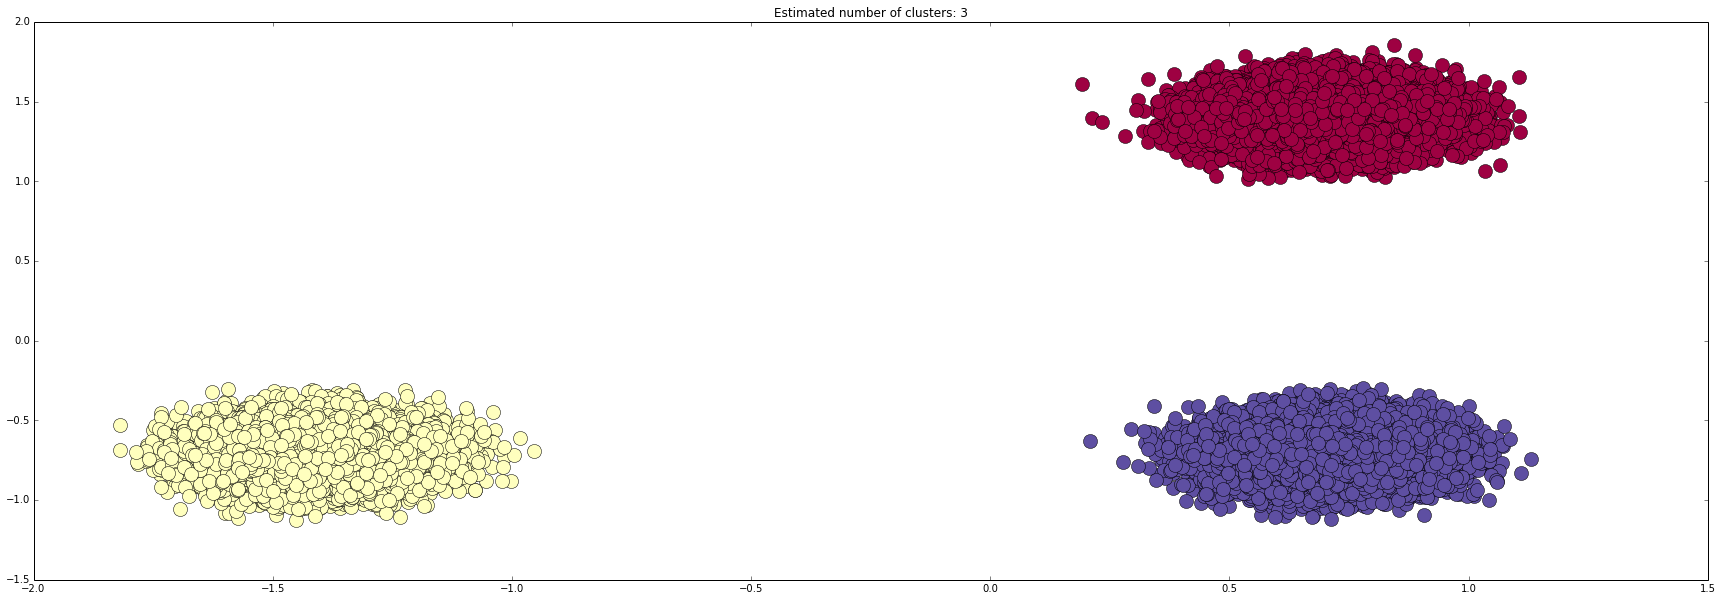

In [5]:
core_samples_mask = np.zeros_like(db_medium.labels_, dtype=bool)
core_samples_mask[db_medium.core_sample_indices_] = True
labels = db_medium.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(30, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_medium[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X_medium[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Compute DBSCAN multiplex

Source here: https://pypi.python.org/pypi/DBSCAN_multiplex/1.5

### Compute ELKI

** <font color='red'>JAVA implementation, not tested!</font>**